# Functional Programming in Python

## Why functions?

* Pure functions can make your programs easier to understand and debug, especially if you use sane variable names and write good docstrings.

* You can decorate functions to add functionality without changing their logic.

* Pure functions can often better represent the mathematic definition of their algorithms.

## What is a pure function?

> A pure function is a function where the return value is only determined by its input values, without observable side effects. This is how functions in math work: Math.cos(x) will, for the same value of x , always return the same result. - [sitepoint](www.sitepoint.com/functional-programming-pure-functions/)

### Let's Try
* Take a positive integer as an input
* Square each number in the range of our input 
* Return the sum of those numbers

### Procedural

In [1]:
def sum_squares_p(num):
    """Return the sum of the squares in a given range."""
    total = 0
    for n in range(num):
        square = n ** 2
        total += square
    return total

sum_squares_p(10)

285

### Object-Oriented

In [2]:
def sum_squares_oo(num):
    """Return the sum of the squares in a given range."""
    total = []
    for n in range(num):
        total.append(n**2)
    return sum(total)

sum_squares_oo(10)

285

###  Comprehension

In [3]:
sum(n**2 for n in range(10))

285

## Iterables vs Iterators

> Data Structures and Algorithms in Python
By: Michael T. Goodrich; Roberto Tamassia; Michael H. Goldwasser
* An iterator is an object that manages an iteration through a series of values. If variable, i, identifies an iterator object, then each call to the built-in function, next(i), produces a subsequent element from the underlying series, with a StopIteration exception raised to indicate that there are no further elements.
* An iterable is an object, obj, that produces an iterator via the syntax iter(obj).

In [4]:
# Lists are iterable but they are not iterators because they have no next method
l = [1, 2, 3, 4, 5]

for i in l:
    print(i)
    
try:
    next(l)
except TypeError as e:
    print('Fail!', e)

1
2
3
4
5
Fail! 'list' object is not an iterator


In [5]:
# However, we can create iterators from iterables, like lists
l = [1, 2, 3, 4, 5]

iterator = iter(l)

try:
    while True:
        print(next(iterator))
except StopIteration:
    print('Our iterator is exhausted!')

1
2
3
4
5
Our iterator is exhausted!


### Generator Function

* A generator is basically a procedure that returns an iterator

In [6]:
def gen_squares(num):
    """Yield each square in a given range."""
    for n in range(num):
        yield n**2

for x in gen_squares(10):
    print(x)

print('sum:', sum(gen_squares(10)))

0
1
4
9
16
25
36
49
64
81
sum: 285


### Recursion

In [7]:
def square_and_sum_recursive(n):
    """Return the sum of the squares in the range n + 1."""
    if n < 2:
        return n
    else:
        return n**2 + square_and_sum_recursive(n-1)
    
square_and_sum_recursive(10)

385

In [8]:
# We can add a flag to skip our initial input.
def square_and_sum_recursive(n, flag=False):
    """
    Return the sum of the squares in range n.
    
    The initial input is not computed by default.
    If flag is set to True, then it will be.
    """
    if n < 2:
        return n
    elif not flag:
        return square_and_sum_recursive(n-1, flag=True)
    else:
        return n**2 + square_and_sum_recursive(n-1, flag=True)
    
square_and_sum_recursive(10)

285

### Anonymous functions

In [9]:
square = lambda x: x**2
print(square(9))

add = lambda x, y: x + y
print(add(2, 3))

81
5


### Higher Order Functions

In [10]:
from functools import reduce

* You'll often see lambdas used in conjunction with the higher order functions map(), filter(), and reduce().

In [11]:
print(map.__doc__)

map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.


In [12]:
print(filter.__doc__)

filter(function or None, iterable) --> filter object

Return an iterator yielding those items of iterable for which function(item)
is true. If function is None, return the items that are true.


In [13]:
print(reduce.__doc__)

reduce(function, sequence[, initial]) -> value

Apply a function of two arguments cumulatively to the items of a sequence,
from left to right, so as to reduce the sequence to a single value.
For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
of the sequence in the calculation, and serves as a default when the
sequence is empty.


In [14]:
# The sum of numbers 0-9 squared
reduce(lambda x, y: x + y, map(lambda x: x**2, range(10)))

285

In [15]:
# Filter out odd numbers in the range 20
list(filter(lambda x: x % 2 != 0, range(20)))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

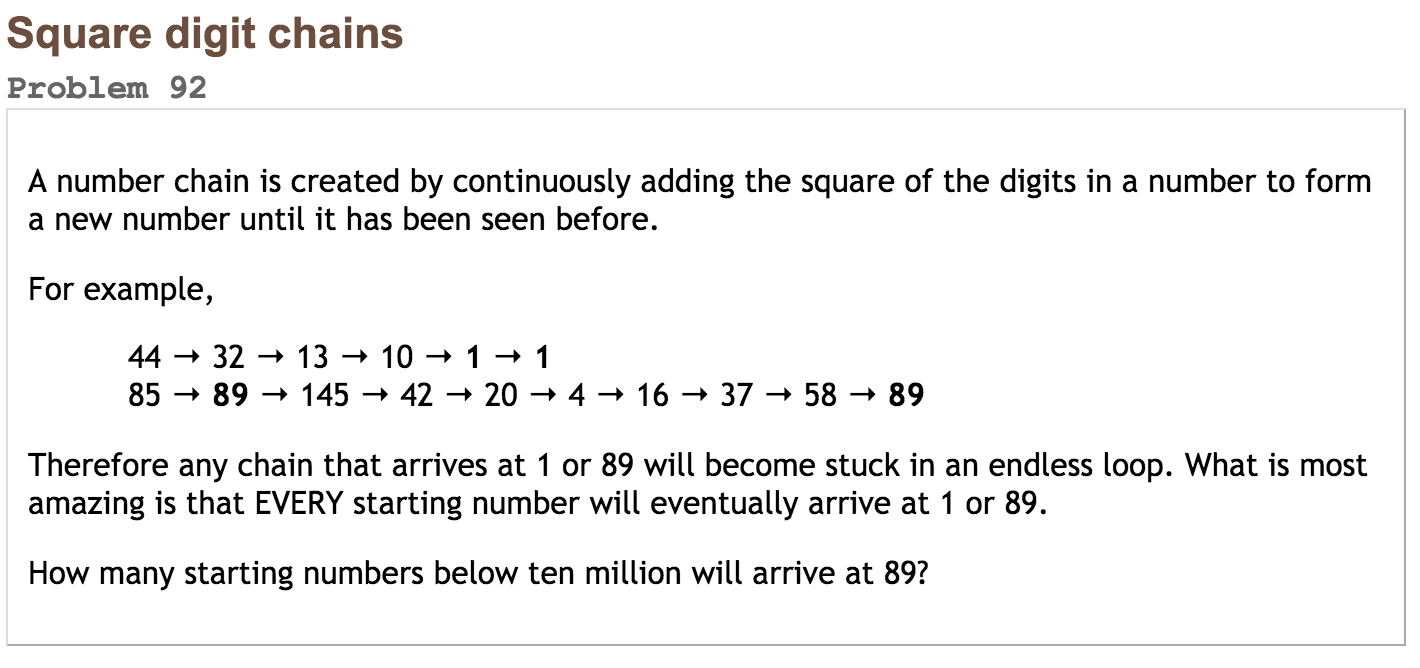

In [16]:
from IPython.display import Image
Image(filename="Screenshot 2015-08-24 23.04.47.png", retina=True)

In [17]:
def split_decimal(decimal):
    """Yield the component integers of a decimal numnber."""
    while decimal:
        yield decimal % 10
        decimal = decimal // 10
        
print(list(split_decimal(5678)))

def sum_squares(n):
    """Return the sum of the square of each integer in a given decimal number."""
    return sum(n**2 for n in split_decimal(n))

sum_squares(44)

[8, 7, 6, 5]


32

In [23]:
def chain(n):
    """
    Yield numbers where each successive number is the sum of
    the digits in the input.
    """
    yield n
    while n != 1 and n != 89:
        # Notice how much cleaner map is in this case than:
        # sum(x**2 for x in [int(c) for c in [i for i in str(n)]])
        n = sum(x**2 for x in map(int, str(n)))
        yield n
        
list(chain(44))

[44, 32, 13, 10, 1]

### Combining functions 

In [19]:
def generate(x, f, z):
    """Return a list of the output of f(x) until z(x) is True."""
    if z(x):
        return [x]
    else:
        return [x] + generate(f(x), f, z)
    
print(generate(44, sum_squares, lambda x: x in {1, 89}))

[44, 32, 13, 10, 1]


In [20]:
def recursively_generate(x, f, z):
    """Yield f(x) until z(x) is True."""
    if z(x):
        yield x
    else:
        yield x
        yield from generate(f(x), f, z)
        # In Python 2 you would write:
        # for i in generate(f(x), f, z): yield i
    
print(list(recursively_generate(44, sum_squares, lambda x: x in {1, 89})))

[44, 32, 13, 10, 1]


### Decorating functions to add functionality

In [25]:
def document(func):
    def new_func(*args, **kwargs):
        print('function name:', func.__name__)
        print('args:', args)
        print('keyword arguments:', kwargs)
        returned = func(*args, **kwargs)
        print('returned:', returned)
        return returned
    return new_func

def assert_positive(func):
    def new_func(*args, **kwargs):
        assert all(n > 0 for n in args), \
        "All args must be positive {}".format(args)
        return func(*args, **kwargs)
    return new_func

@assert_positive
@document
def sum_squares(n):
    return sum(n**2 for n in split_decimal(n))

print(sum_squares(34))

try:
    print(sum_squares(-34))
except AssertionError as e:
    print()
    print('Failed as expected :)', e)

function name: sum_squares
args: (34,)
keyword arguments: {}
returned: 25
25

Failed as expected :) All args must be positive (-34,)


### A solution to Project Euler #92!

In [22]:
def split_decimal(decimal):
    """Yield the component integers of a decimal number."""
    while decimal:
        yield decimal % 10
        decimal = decimal // 10

def sum_squares(n, squares=[n**2 for n in range(10)]):
    """
    Return the sum of the square of each integer in a given decimal number.
    
    It is interesting to note that the squares keyword argument 
    is only computed once at runtime.
    We are creating something like a global variable without polluting the
    global namespace. To keep this function 'pure', however, we have to
    resort to a dirty assertion hack.
    """
    assert squares is sum_squares.__defaults__[0], \
    "Don't modify squares argument."
    total = 0
    for i in split_decimal(n):
        total +=  squares[i]
    return total

def chain(n):
    """
    Yield numbers where each successive number
    is the sum of the integers in the input
    until 1 or 89 is reached.
    """
    yield n
    while n != 1 and n != 89:
        n = sum_squares(n)
        yield n
        
def main(number):
    ones = {1}
    eighty_nines = {89}
    for num in range(2, number+1):
        temp = set()
        for n in chain(num):
            temp.add(n)
            if n == 89 or n in eighty_nines:
                eighty_nines.update(temp)
                break
            elif n == 1 or n in ones:
                ones.update(temp)
                break
    return len(eighty_nines)
    
if __name__ == '__main__':
    import time
    start = time.time()
    print('result:', main(10000000))
    print('{} minutes elapsed.'.format((time.time() - start)/60))

result: 8581146
0.882961384455363 minutes elapsed.
